In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Будем использовать только обучающую выборку
data = pd.read_csv('data.csv', sep=",")

In [2]:
# размер набора данных
data.shape

(18207, 89)

In [3]:
# типы колонок
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [4]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [7]:

data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 18207


In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((18207, 89), (18207, 13))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((18207, 89), (0, 89))

In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
# Обработка пропусков числовых признаков. Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка International Reputation. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Weak Foot. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Skill Moves. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Jersey Number. Тип данных float64. Количество пустых значений 60, 0.33%.
Колонка Crossing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Finishing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка HeadingAccuracy. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка ShortPassing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Volleys. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Dribbling. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Curve. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка FKAccuracy. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка LongPassing. Тип данных float64. Количество 

In [20]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,1.0,2.0,2.0,22.0,34.0,38.0,40.0,49.0,25.0,42.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,1.0,2.0,2.0,21.0,23.0,52.0,52.0,43.0,36.0,39.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,1.0,3.0,2.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,1.0,3.0,2.0,34.0,44.0,50.0,39.0,42.0,40.0,51.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


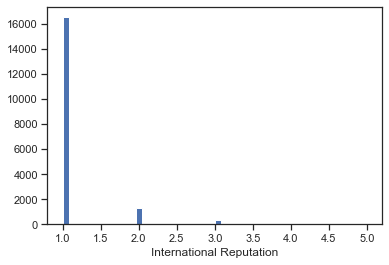

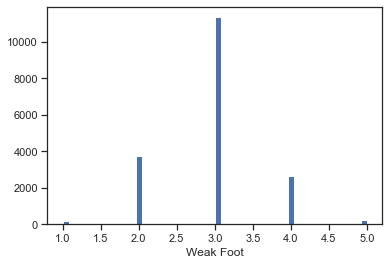

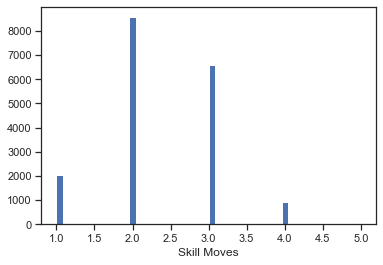

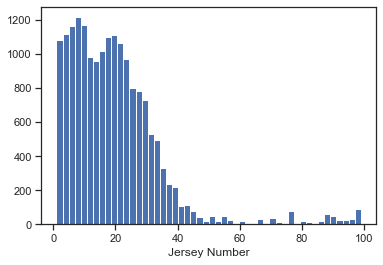

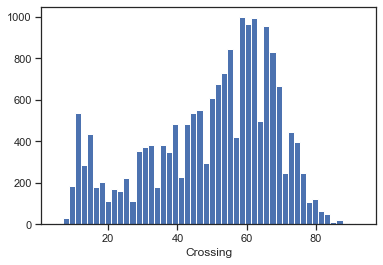

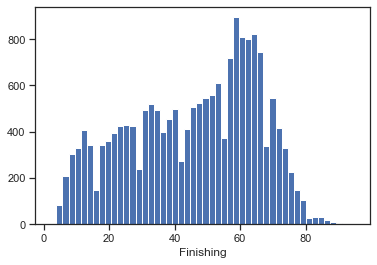

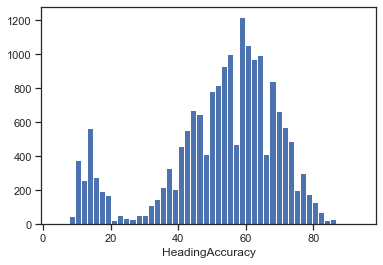

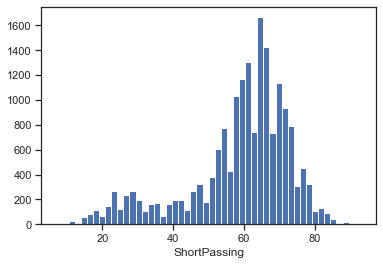

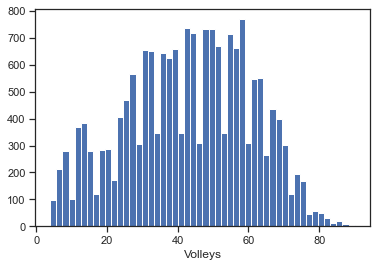

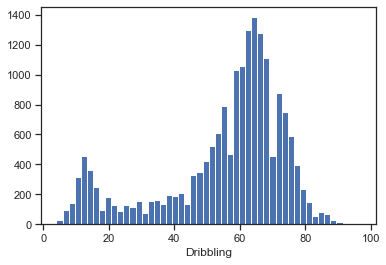

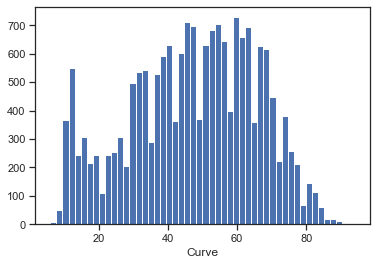

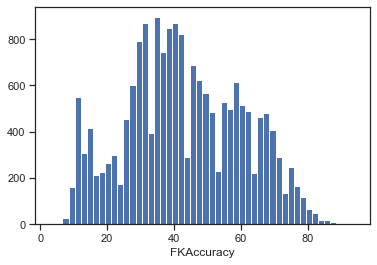

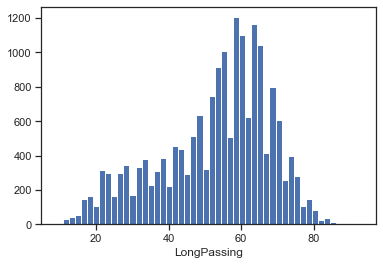

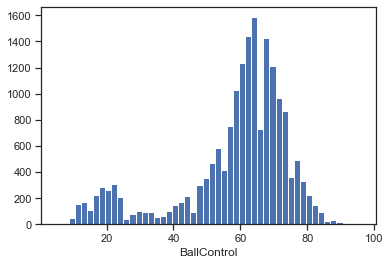

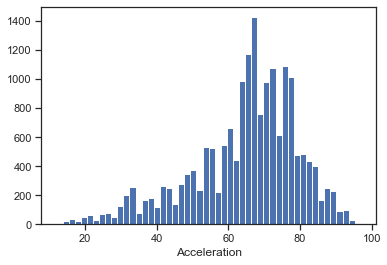

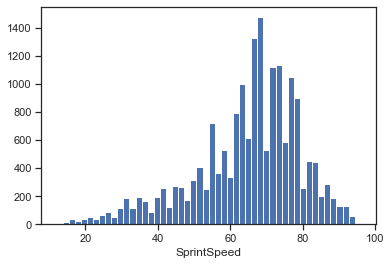

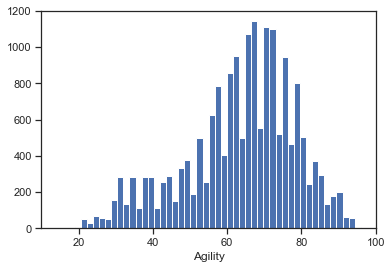

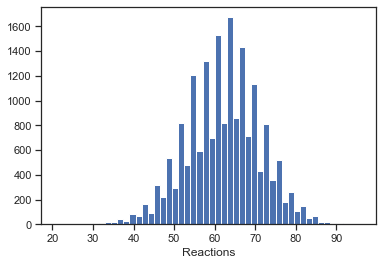

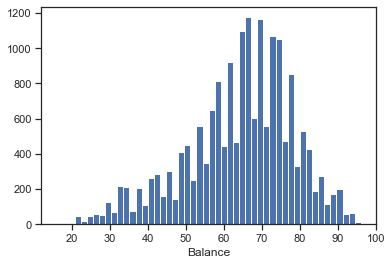

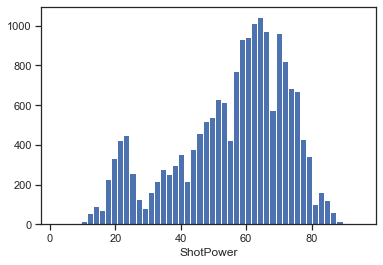

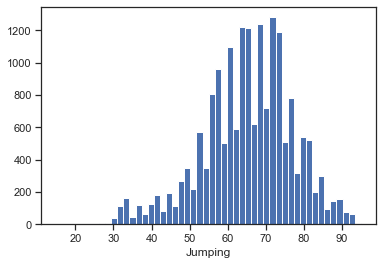

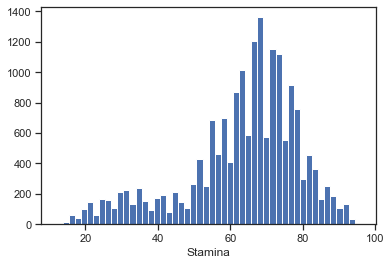

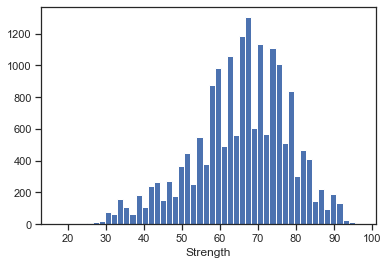

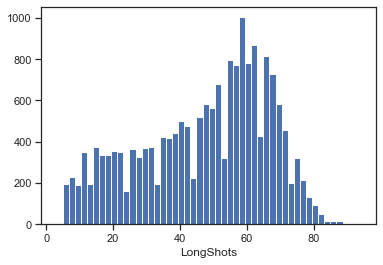

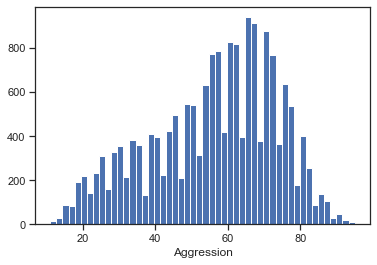

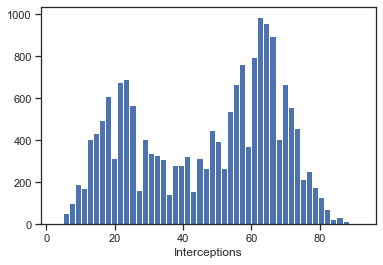

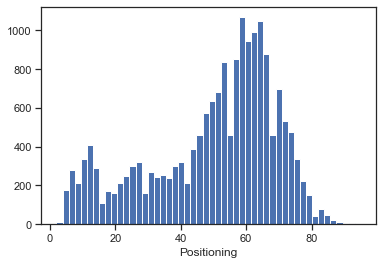

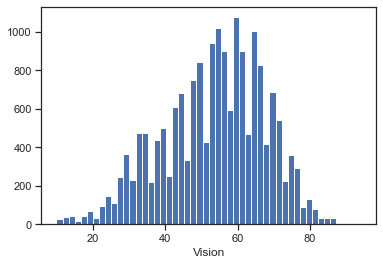

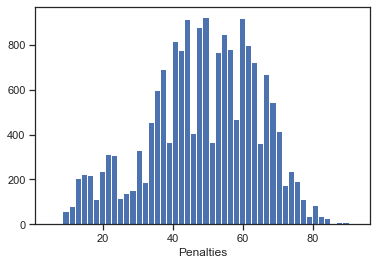

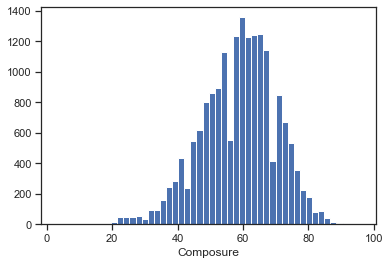

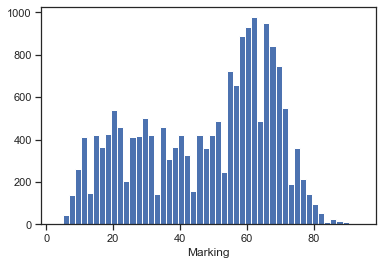

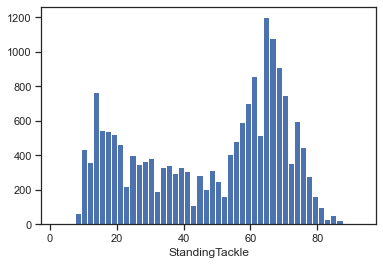

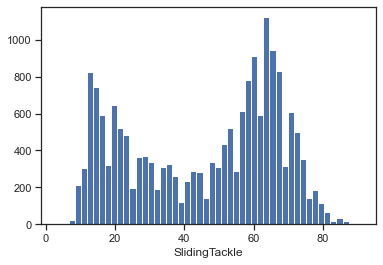

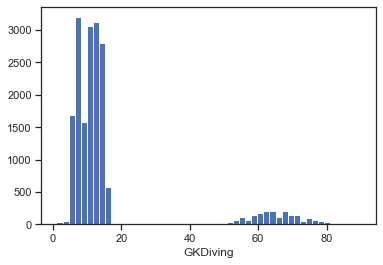

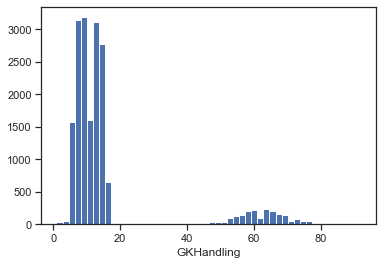

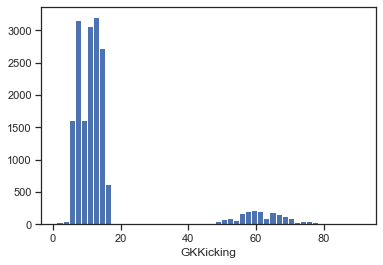

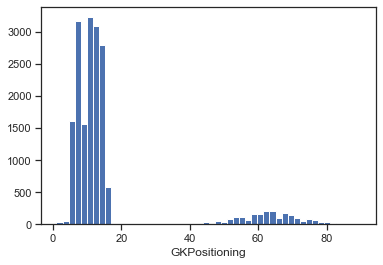

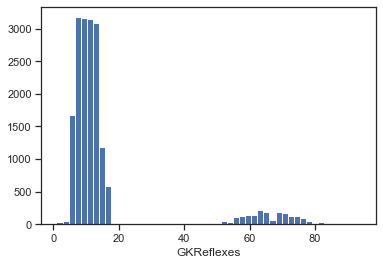

In [21]:
# Гистограмма по признакам ( как дополнительное задание группе ИУ5-62Б)
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [31]:
data_num_Crossing = data_num[['Crossing']]
data_num_Crossing.head()

,Crossing
0,84.0
1,84.0
2,79.0
3,17.0
4,93.0


In [34]:
strategies=['mean', 'median', 'most_frequent']

In [35]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Crossing)
    return data_num_imp[mask_missing_values_only]

In [36]:
strategies[0], test_num_impute(strategies[0])


('mean',
 array([49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814, 49.7341814, 49.7341814,
        49.7341814, 49.7341814, 49.7341814]))

In [37]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54.,
        54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54.,
        54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54.,
        54., 54., 54., 54., 54., 54., 54., 54., 54.]))

In [38]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62.,
        62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62.,
        62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62.,
        62., 62., 62., 62., 62., 62., 62., 62., 62.]))

In [39]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Club. Тип данных object. Количество пустых значений 241, 1.32%.
Колонка Preferred Foot. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Work Rate. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Body Type. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Real Face. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Position. Тип данных object. Количество пустых значений 60, 0.33%.
Колонка Joined. Тип данных object. Количество пустых значений 1553, 8.53%.
Колонка Loaned From. Тип данных object. Количество пустых значений 16943, 93.06%.
Колонка Contract Valid Until. Тип данных object. Количество пустых значений 289, 1.59%.
Колонка Height. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Weight. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка LS. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка ST. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка R

In [40]:
cat_temp_data = data[['Club']]
cat_temp_data.head()

,Club
0,FC Barcelona
1,Juventus
2,Paris Saint-Germain
3,Manchester United
4,Manchester City


In [42]:
cat_temp_data['Club'].unique()


array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [43]:
cat_temp_data[cat_temp_data['Club'].isnull()].shape

(241, 1)

In [44]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['FC Barcelona'],
       ['Juventus'],
       ['Paris Saint-Germain'],
       ...,
       ['Cambridge United'],
       ['Tranmere Rovers'],
       ['Tranmere Rovers']], dtype=object)

In [45]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array([' SSV Jahn Regensburg', '1. FC Heidenheim 1846',
       '1. FC Kaiserslautern', '1. FC Köln', '1. FC Magdeburg',
       '1. FC Nürnberg', '1. FC Union Berlin', '1. FSV Mainz 05',
       'AC Ajaccio', 'AC Horsens', 'AD Alcorcón', 'ADO Den Haag',
       'AEK Athens', 'AFC Wimbledon', 'AIK', 'AJ Auxerre', 'AS Béziers',
       'AS Monaco', 'AS Nancy Lorraine', 'AS Saint-Étienne', 'AZ Alkmaar',
       'Aalborg BK', 'Aarhus GF', 'Aberdeen', 'Accrington Stanley',
       'Adelaide United', 'Ajax', 'Akhisar Belediyespor', 'Al Ahli',
       'Al Batin', 'Al Faisaly', 'Al Fateh', 'Al Fayha', 'Al Hazem',
       'Al Hilal', 'Al Ittihad', 'Al Nassr', 'Al Qadisiyah', 'Al Raed',
       'Al Shabab', 'Al Taawoun', 'Al Wehda', 'Alanyaspor', 'Albacete BP',
       'Alianza Petrolera', 'Amiens SC', 'América FC (Minas Gerais)',
       'América de Cali', 'Angers SCO', 'Antalyaspor',
       'Argentinos Juniors', 'Arka Gdynia', 'Arsenal', 'Ascoli',
       'Aston Villa', 'Atalanta', 'Athletic Club de Bilba